## Mathematics of Machine Learning

### Chapter 3: Linear classification methods
### Section 3.5: Kernel SVM Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import svm
from sklearn.metrics import accuracy_score


#### (0) Data Preparation

In [2]:
# Load data
x = np.genfromtxt("data_KSVM_X.csv", delimiter=',')
y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')
y = y.reshape(1, y.shape[0])


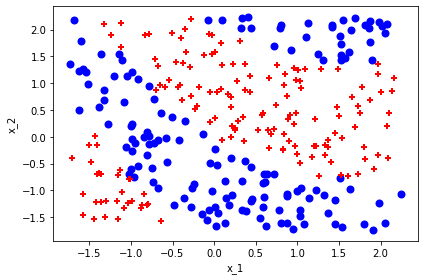

In [3]:
# Plot the training data

fig, ax = plt.subplots()

indp = [i for (i, val) in enumerate(y[0]) if val == 1]
indm = [i for (i, val) in enumerate(y[0]) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2)

plt.xlabel("x_1")
plt.ylabel("x_2")

fig.tight_layout()

#### (1) Soft Kernel SVM rule (Gaussian kernel)

In [4]:
# Lambda for Soft Rule
m = len(y[0])
lam = 0.5/m

print(m)
print(lam)

300
0.0016666666666666668


In [5]:
# Scaling parameter
kappa = 4

In [6]:
X = np.genfromtxt("data_KSVM_X.csv", delimiter=',').T
Y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')

In [7]:
# Create a support vector classifier
clf = svm.SVC(kernel='rbf', gamma=1/np.sqrt(kappa))
# C=0.5/m/lam,
# gamma=1/np.sqrt(kappa)
# Learn on the train subset
clf.fit(X, Y)

SVC(gamma=0.5)

[[-1.75  -1.75  -1.75  ... -1.75  -1.75  -1.75 ]
 [-1.742 -1.742 -1.742 ... -1.742 -1.742 -1.742]
 [-1.734 -1.734 -1.734 ... -1.734 -1.734 -1.734]
 ...
 [ 2.234  2.234  2.234 ...  2.234  2.234  2.234]
 [ 2.242  2.242  2.242 ...  2.242  2.242  2.242]
 [ 2.25   2.25   2.25  ...  2.25   2.25   2.25 ]]
(501, 501)
(251001, 2)
Z [-2.27427508 -2.28093571 -2.28746194 ...  1.33120694  1.3348002
  1.33820396]
Z [[-2.27427508 -2.28093571 -2.28746194 ...  0.2533824   0.24389099
   0.23447351]
 [-2.2784427  -2.2850464  -2.2915146  ...  0.24247011  0.23299257
   0.22358988]
 [-2.28242141 -2.28896692 -2.29537581 ...  0.23144959  0.22198728
   0.21260073]
 ...
 [ 1.24709237  1.24592436  1.2445866  ...  1.35947562  1.3630899
   1.36651174]
 [ 1.24241797  1.24125743  1.2399279  ...  1.34533188  1.34893554
   1.35234823]
 [ 1.23773051  1.23657775  1.23525677 ...  1.33120694  1.3348002
   1.33820396]]


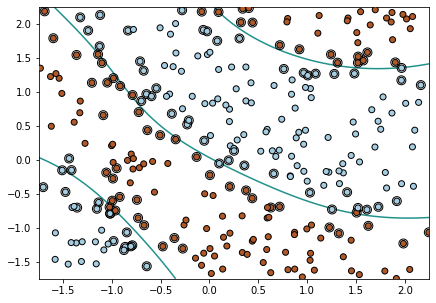

In [8]:
# figure number
fignum = 1

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(7, 5))
# plt.clf()

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

plt.axis("tight")
x_min = -1.75
x_max = 2.25
y_min = -1.75
y_max = 2.25

# x_min = -3
# x_max = 3
# y_min = -3
# y_max = 3


# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
XX, YY = np.mgrid[x_min:x_max + 4/500:4/500, y_min:y_max + 4/500:4/500]
print(XX)
print(XX.shape)

Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(np.c_[XX.ravel(), YY.ravel()].shape)
print('Z', Z)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
print('Z', Z)
# plt.figure(fignum, figsize=(4, 3))
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(
    XX,
    YY,
    Z,
    # colors=["k", "k", "k"],
    # linestyles=["--", "-", "--"],
    # levels=[-0.5, 0, 0.5],
    levels = 0
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())
fignum = fignum + 1
plt.show()

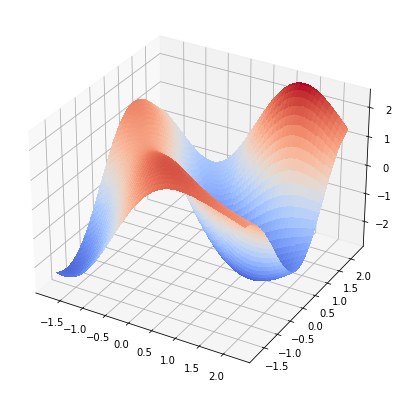

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [10]:
# Generate discretization grid
x1 = np.array([i for i in np.arange(-1.75, 2.25 + 4/500, 4/500)]) # Grid points in x1 direction
x1 = x1.reshape(1, x1.shape[0])
x2 = np.array([i for i in np.arange(-1.75, 2.25 + 4/500, 4/500)]) # Grid points in x2 direction
x2 = x2.reshape(1, x2.shape[0])

XX1, XX2 = np.meshgrid(x1, x2) # Create 2D grid

# Grid point matrices as column vectors
X1 = np.ravel(XX1, order='F')
X1 = X1.reshape(X1.shape[0], 1)

X2 = np.ravel(XX2, order='F')
X2 = X2.reshape(X2.shape[0], 1)

print(XX1)
print(X1)
print(XX1.shape)
print(XX2.shape)
print(X1.shape)
print(X2.shape)

[[-1.75  -1.742 -1.734 ...  2.234  2.242  2.25 ]
 [-1.75  -1.742 -1.734 ...  2.234  2.242  2.25 ]
 [-1.75  -1.742 -1.734 ...  2.234  2.242  2.25 ]
 ...
 [-1.75  -1.742 -1.734 ...  2.234  2.242  2.25 ]
 [-1.75  -1.742 -1.734 ...  2.234  2.242  2.25 ]
 [-1.75  -1.742 -1.734 ...  2.234  2.242  2.25 ]]
[[-1.75]
 [-1.75]
 [-1.75]
 ...
 [ 2.25]
 [ 2.25]
 [ 2.25]]
(501, 501)
(501, 501)
(251001, 1)
(251001, 1)


#### (2.1) Plot the dividing lines

In [11]:
### decision ###
grid_labels = clf.decision_function(np.concatenate((X1, X2), axis=1))
print(np.concatenate((X1, X2), axis=1).shape)
# Predicted labels on grid points
# grid_labels = KSVM.predict_proba(np.concatenate((X1, X2), axis=1))
print(grid_labels)
print(grid_labels.shape)
# print(np.reshape(grid_labels, XX1.shape))
# print(grid_labels.shape)

(251001, 2)
[-2.27427508 -2.28093571 -2.28746194 ...  1.33120694  1.3348002
  1.33820396]
(251001,)


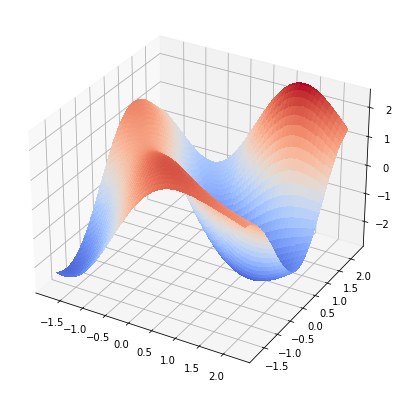

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX1.T, XX2.T, np.reshape(grid_labels, XX1.shape), cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [13]:
# Get support vectors
support_vectors = clf.support_vectors_

In [14]:
print(np.reshape(grid_labels, XX1.shape))

[[-2.27427508 -2.28093571 -2.28746194 ...  0.2533824   0.24389099
   0.23447351]
 [-2.2784427  -2.2850464  -2.2915146  ...  0.24247011  0.23299257
   0.22358988]
 [-2.28242141 -2.28896692 -2.29537581 ...  0.23144959  0.22198728
   0.21260073]
 ...
 [ 1.24709237  1.24592436  1.2445866  ...  1.35947562  1.3630899
   1.36651174]
 [ 1.24241797  1.24125743  1.2399279  ...  1.34533188  1.34893554
   1.35234823]
 [ 1.23773051  1.23657775  1.23525677 ...  1.33120694  1.3348002
   1.33820396]]


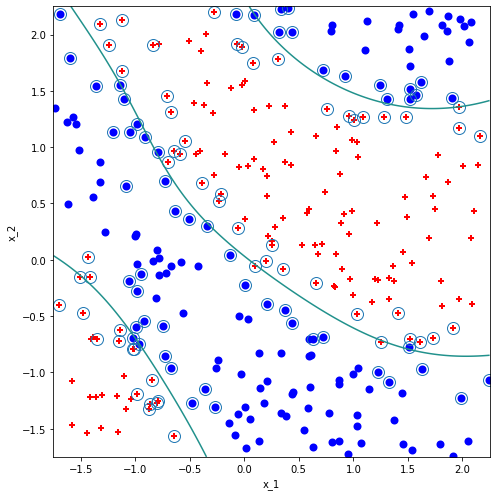

In [15]:
# Plotting

fig, ax = plt.subplots(figsize=(7, 7))

indp = [i for (i, val) in enumerate(y[0]) if val == 1]
indm = [i for (i, val) in enumerate(y[0]) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2)

# Plot support vectors
plt.plot(support_vectors[:, 0], support_vectors[:, 1], marker="o", markersize=12, markerfacecolor="None", linestyle='None')

# Learned dividing lines
# CS = ax.contour(XX1, XX2, np.reshape(grid_labels, XX1.shape), cmap=cm.Paired, levels=0)
# ax.clabel(CS, inline=False)

Z = grid_labels.reshape(XX1.shape)
plt.contour(
    XX1.T,
    XX2.T,
    Z,
    # colors=["k", "k", "k"],
    # linestyles=["--", "-", "--"],
    # levels=[-0.5, 0, 0.5],
    levels = 0
)

# Plot true dividing lines
# plt.plot(x1[0], (x1[0]**2 - 3*x1[0] - 2*0)/3, '-k')
# plt.plot(x1[0], (x1[0]**2 - 3*x1[0] - 2*np.pi)/3, '-k')
# plt.plot(x1[0], (x1[0]**2 - 3*x1[0] + 2*np.pi)/3, '-k')

plt.ylim(-1.75,2.25)
# plt.xlim(-1.75,2.25)
plt.xlabel("x_1")
plt.ylabel("x_2")

fig.tight_layout()
plt.show()

#### (2.2) Plot RKHS function

In [16]:
# Coordinates of support vectors
SV_supp = support_vectors.T

# Number of support vectors
m_supp = SV_supp.shape[1]
print(m_supp)


114
